In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# C0 -> LiDAR Extrinsic Parameter
R = np.array([[ 7.533745e-03, -9.999714e-01, -6.166020e-04],
              [ 1.480249e-02,  7.280733e-04, -9.998902e-01],
              [ 9.998621e-01,  7.523790e-03,  1.480755e-02]])

t = np.array([ -4.069766e-03, -7.631618e-02, -2.717806e-01 ])

C02L = np.eye(4)
C02L[:3, :3] = R
C02L[:3, 3] = t

In [12]:
# C0 -> C2 Extrinsic Parameter
R_02 = np.array([ [ 9.999758e-01, -5.267463e-03, -4.552439e-03],
                  [ 5.251945e-03,  9.999804e-01, -3.413835e-03],
                  [ 4.570332e-03,  3.389843e-03,  9.999838e-01]])

T_02 = np.array([   5.956621e-02,  2.900141e-04,  2.577209e-03 ])
C02C2 = np.eye(4)
C02C2[:3, :3] = R_02
C02C2[:3, 3] = T_02

In [13]:
# C2 -> L Extrinsic Parameter
C02C2_inv = np.linalg.inv(C02C2)
C22L = np.matmul(C02C2_inv, C02L)

In [14]:
# Intrinsic Parameter
K = np.array([[ 9.597910e+02,  0.000000e+00,  6.960217e+02],
              [ 0.000000e+00,  9.569251e+02,  2.241806e+02],
              [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

# P = np.insert(K, 3, values = [0, 0, 0], axis=1)
P = np.array([[ 7.215377e+02,  0.000000e+00,  6.095593e+02, 4.485728e+01],
              [ 0.000000e+00,  7.215377e+02,  1.728540e+02, 2.163791e-01],
              [ 0.000000e+00,  0.000000e+00,  1.000000e+00, 2.745884e-03]])

D = np.array([-3.691481e-01,
               1.968681e-01,
               1.353473e-03,
               5.677587e-04,
              -6.770705e-02])

lidar_dtype=[('x', np.float32),
             ('y', np.float32),
             ('z', np.float32),
             ('intensity', np.float32)]

image = cv2.imread('0000000000.png', 1)
h, w, _ = image.shape

scan = np.fromfile('0000000000.bin', dtype = lidar_dtype)
points = np.stack((scan['x'], scan['y'], scan['z']), axis = -1)
ptcloud = np.insert(points, 3, 1, axis = 1).T

In [15]:
## Problem (Generate LiDAR Point based on Camera Coordinates)
## =================================================================

## 1. LiDAR의 PointCloud를 Camera 2 좌표계로 변환하기

## 2. 카메라 좌표계에 맞게 뒤를 보는 부분 제거

## 3. Normalization

## 4. 이미지 바깥에 있는 Point (Outlier) 제거

## =================================================================

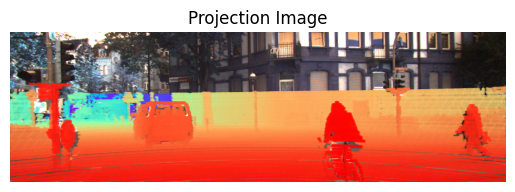

In [18]:
## 1
ptcloud_cam2 = np.dot(C22L,ptcloud)

## 2
ptcloud_cam2 = ptcloud_cam2[:,ptcloud_cam2[2] > 0]

## 3
ptcloud_img = np.matmul(P, ptcloud_cam2)
ptcloud_img = ptcloud_img[:2] / ptcloud_img[2]

## 4
mask = (ptcloud_img[0] >= 0)&(ptcloud_img[0] < w)&(ptcloud_img[1] >= 0)&(ptcloud_img[1] < h)
ptcloud_img = ptcloud_img[:,mask]
ptcloud_cam2 = ptcloud_cam2[:,mask]

u = ptcloud_img[0]
v = ptcloud_img[1]
z = ptcloud_cam2[2]
fig1 = plt.figure(1)
ax1  = fig1.subplots(1, 1)

ax1.scatter(u,v,c=z, cmap='rainbow_r', alpha=0.5, s=2)
ax1.imshow(image)
ax1.set_title('Projection Image')
ax1.axis("off")

plt.show()